
## Reliability analysis with random variables

### Problem definition

(sec:reliability_theory)=
#### Reliability theory

The aim of structural reliability analysis is to compute the probability
that the performance of a system is less than some specified threshold;
this probability is known as the failure probability of the system.
Firstly, the performance of the system, $g({\boldsymbol{x}})$, is
defined as a function of the vector of system variables,
$\boldsymbol{x} = (x_1, x_2,\ldots,x_i,\ldots)$. The performance
function is negative when the system fails, and otherwise positive. Then
the failure probability can be found by solving the integral
```{math}
:label: eqn:pf
P_f=P(g({\boldsymbol{x}})<0) = \int \mathbb{I}_f({\boldsymbol{x}}) f_X({\boldsymbol{x}}) d{\boldsymbol{x}},
```   
where the indicator function, $\mathbb{I}_f({\boldsymbol{x}})$, is
defined as $\mathbb{I}_f({\boldsymbol{x}}) = \left\{\begin{array}{lr}
        1, & \text{for } g({\boldsymbol{x}})<0\\
        0, & \text{for } g({\boldsymbol{x}})\ge0
        \end{array}\right\} ,$ and the probability density function of
the system random variables is $f_X({\boldsymbol{x}})$
{cite}`melchers2018structural`. It is common for the performance function to
be defined in the load resistance form, e.g.
```{math}
:label: eqn:load-resistance
g(\boldsymbol{x}) = \sum_{i\in R} x_i - \sum_{i\in L} x_i,
```
where $R$ are indices corresponding to resistance factors and $L$ are
indices corresponding to load factors, so that the system fails when the
sum of loads is greater than the sum of resistances {cite}`Prinja_2016`. When
the resistance and load are balanced, $g(\boldsymbol{x})=0$ and the
system is on the interface of the safety and failure regions. The limit
state surface is specified by the $\boldsymbol{x}$ for which
$g(\boldsymbol{x})=0$.

In fault tree analysis the failure event of a system is written in terms
of failure events for smaller subsystems or components, using Boolean
algebra. Probability arithmetic can be used with the fault tree to
combine failure probabilities for individual subsystems to obtain the
failure probability for the whole system. This requires knowledge of the
dependencies between the probability of failure events for the
considered sub-systems {cite}`melchers2018structural`.

#### Reliability based design optimisation

In reliability based design optimisation (RBDO), a cost function, e.g.
the weight or construction cost of the system, is minimised subject to
the constraint that the failure probability of the system does not fall
below a certain value. The reliability based design optimisation problem
can be stated as the optimisation program
```{math}
:label: eqn:rbdo
\operatorname{argmin}{\{\text{cost}(\boldsymbol{d}): P_f(\boldsymbol{d})<P_\text{target} \}},
```
where $\boldsymbol{d}$ is the vector of design variables,
$\text{cost}(\boldsymbol{d})$ is the cost function of the design,
$P_f(\boldsymbol{d})$ is the failure probability of the design, and
$P_\text{target}$ is the target failure probability. Usually the vector
of design variables, $\boldsymbol{d}$, will be parameters of the random
variables, $f_X({\boldsymbol{x}})$, associated with the resistance, such
that {eq}`eqn:rbdo` usually finds a balance between a cost effective
design and a design where the resistance of the system is sufficiently
greater than the load {cite}`melchers2018structural`.

In engineering practice the model of the structure is often
computationally expensive to evaluate, and therefore it may be more
convenient to find a sub-optimal solution to
{eq}`eqn:rbdo`, by designing the structure based on engineering
judgement. Approximate rules of thumb, such as partial safety factors,
allow the reliability of the system to be constrained approximately
using analytical equations {cite}`melchers2018structural`. Then the full
reliability analysis can be performed with the proposed design to ensure
that the reliability of the system satisfies the constraints in
{eq}`eqn:rbdo`. Hence a safe and efficient design can be obtained
with reduced computational effort.

#### Sensitivity analysis

Sensitivity analysis allows the effect of each uncertain variable on the
variability of the model response to be quantified. This can be achieved
either by local methods, which describe variability of the model
response at the expected value of the system variables, or global
methods, which describe the total variability of the model response.

Local sensitivity analysis is often achieved by evaluating the first
derivative of the model response with respect to the system variables.
Similarly, {cite}`birnbaum1968importance` defines component importance as the
partial derivative of the system reliability with respect to the
reliability of the component.

Global sensitivity analysis is usually performed by evaluating the Sobol
indices,
```{math}
:label: eqn:sobol
S_i = \frac{\operatorname{Var}_{x_i}(\mathbb{E}_{x_{\sim i}}(g(\boldsymbol{x})))}{Var(g(\boldsymbol{x}))},
```
which describe the contribution of the variance of $x_i$ to the total
variance of the model response $g(\boldsymbol{x})$, when only $x_i$ is
varied. $x_{\sim i}$ represents all random variables other than $x_i$.
The Total Effect indices, given by
```{math}
:label: eqn:total-sensitivity
T_i = 1 - \frac{\operatorname{Var}_{x_{\sim i}}(\mathbb{E}_{x_i}(g(\boldsymbol{x})))}{Var(g(\boldsymbol{x}))},
```
include the effect of interactions caused by varying $x_i$ whilst
varying other variables {cite}`saltelli2004sensitivity`.

The most simple way to evaluate the Sobol indices and total effect
indices is by using a Monte Carlo estimator for the expectation and
variance terms in {eq}`eqn:sobol` and
{eq}`eqn:total-sensitivity`. In some cases, for example when the
model has too many parameters or the model is very computationally
expensive, it is necessary to use a more complex method to compute the
Sobol and total sensitivity indices. For example, the upper bound of the
total sensitivity index can be efficiently calculated by integrating the
local sensitivity analysis over the whole space of the inputs
{cite}`patelli2010global`, and the Sobol indices can be efficiently
calculated by use of the Fourier Amplitude Sensitivity Testing (FAST)
method {cite}`tarantola2006random`.

(sec:compute_failure_prob)=
### Methods to compute the failure probability

In some circumstances the failure probability can be computed
analytically, for example when the system variables $\boldsymbol{x}$ are
normally distributed and the performance function is linear
{cite}`melchers2018structural`. However, often a closed form solution of
{eq}`eqn:pf` is
not available and hence alternative methods must be used.

#### Monte Carlo simulation

In general, the failure probability can be computed by Monte Carlo
simulation, as discussed for general functions in
{ref}`ch:uncertainty_models`. The Monte Carlo estimator for the
failure probability is
```{math}
:label: eqn:mc-estimator
\hat{P}_f = \frac{1}{N} \sum_{i=1}^{N} \mathbb{I}_f({\boldsymbol{x}}^{(i)}),
```
where $N$ samples, ${\boldsymbol{x}}^{(i)}$, are drawn from the the
probability density function of the system random variables
$f_X({\boldsymbol{x}})$. The coefficient of variation of the failure
probability estimator is
$\operatorname{CoV}[\hat{P}_f] = \sqrt{\frac{1-P_f}{N P_f}}.$
Therefore, obtaining order of magnitude estimates of $P_f$ with Monte
Carlo simulation requires at least $\frac{1}{P_f}$ samples, and for an
accurate estimate even more samples are required. If $P_f$ is small and
$g(\boldsymbol{x})$ is expensive to evaluate then the number of samples
required is unreasonably large, and more efficient strategies are
required to evaluate $P_f$.

#### Efficient sampling strategies

Several sampling strategies have been proposed to choose a set of
samples which can be used to reduce the variance of the Monte Carlo
estimator in
{eq}`eqn:mc-estimator` without expending additional computational
effort. Low-discrepancy sampling strategies aim to choose a set of
samples which cover the sampling domain with the desired density. This
is often not the case with a small random set of samples, which may fall
disproportionately in one area of the sampling domain before the law of
large numbers takes effect. Stratified Sampling strategies, such as
Latin Hypercube Sampling divide the probability density of the system
variables into an $n$-dimensional grid, where each grid element contains
equal probability density. Then a sample may be chosen at random in each
grid element, resulting in a set of samples which covers the sampling
domain well. For linear functions it can be shown that this sampling
strategy has a lower variance than the traditional Monte Carlo estimator
{cite}`Iman2001AppendixA`. The main disadvantage of efficient sampling
strategies is that the reduction in the coefficient of variation is
small when compared to other techniques, e.g. Line Sampling.

#### First Order Reliability Method

The First Order Reliability Method (FORM) allows the probability of
failure of a system to be computed without Monte Carlo simulation.
Assuming the system variables are distributed normally and
independently, the probability of failure can be obtained analytically
if the performance function, $g(\boldsymbol{x})$, is linear. If the
performance function is not linear, a Taylor expansion can be used to
find a linear approximation of the limit state function as shown in
{numref}`fig:form`. If
the system random variables are not normally distributed then a
transformation must first be applied to the random variables and the
limit state function, so that FORM can be applied
{cite}`melchers2018structural`.

The performance function, $g(\boldsymbol{x})$, is written as the Taylor
series expansion
```{math}
:label: eqn:taylor
g(\boldsymbol{x}) = g(\boldsymbol{x}^*) + (\boldsymbol{x}-\boldsymbol{x}^*)\nabla g(\boldsymbol{x}^*)+\ldots = (\boldsymbol{x}-\boldsymbol{x}^*)\nabla g(\boldsymbol{x}^*)+\ldots,
```
about the point $\boldsymbol{x}^*$, which is usually chosen to be the
point on the limit state surface with the highest probability density.
This point is known as the design point, and can be obtained by solving
the optimisation program
$\boldsymbol{x}^* = \operatorname{argmin}_{\boldsymbol{x}} \{|\boldsymbol{x}|^2: g(\boldsymbol{x})=0 \}.$
Alternatively, using the assumption of a linear performance function,
the design point can be determined using the gradient of the performance
function. The reliability index is defined as
$\beta = \sqrt{|\boldsymbol{x}^*|^2}$, and in the case of normally
distributed random variables and a linear limit state function
$P_f = \phi(-\beta)$. This can be shown by observing that when
$\boldsymbol{x}^*$ has a standard normal distribution and
$g(\boldsymbol{x})$ is linear (as in
{eq}`eqn:taylor`, the system performance will have a normal
distribution with mean
$\mathbb{E}_{\boldsymbol{x}} (g(\boldsymbol{x})) =  ( \mathbb{E}_{\boldsymbol{x}} (\boldsymbol{x}) -\boldsymbol{x}^*)\nabla g(\boldsymbol{x}^*) =  -\boldsymbol{x}^*\nabla g(\boldsymbol{x}^*)$
and variance
$\operatorname{Var}_{\boldsymbol{x}} (g(\boldsymbol{x})) = |\nabla g(\boldsymbol{x}^*)|^2.$
Therefore, since
$\boldsymbol{x}^* = \beta \frac{\nabla g(\boldsymbol{x}^*)}{\sqrt{ |\nabla g(\boldsymbol{x}^*)|^2}}$,
$P_f = \phi\left(\frac{-\mathbb{E}_{\boldsymbol{x}} (g(\boldsymbol{x}))}{\sqrt{\operatorname{Var}_{\boldsymbol{x}} (g(\boldsymbol{x}))}}\right)$
leads to the desired expression.

The main advantage of FORM is the small number of samples required to
estimate the failure probability. The main disadvantage of FORM is that
for non-linear limit state surfaces the method is likely to be extremely
inaccurate, due to the degradation of the Taylor series approximation
for limit state surfaces with high curvature. Non-linear limit state
surfaces are often induced by the transformation of the system's random
variables to the standard normal space.

```{figure} figures/form.png
---
height: 150px
name: fig:form
---
A diagram of the First Order Reliability Method for two system
variables, shown with random variables in the standard normal
space.
```

#### Second Order Reliability Method

The estimate of the probability of failure obtained from the first order
reliability method may be incorrect for nonlinear limit state functions.
Therefore, a more accurate quadratic approximation to the limit state surface
can be used.
This is known as the second order reliability method (SORM).

{cite}`breitung1984asymptotic` {cite}`breitung1994asymptotic` shows that the probability of failure for
quadratic limit state surfaces can be asymptotically approximated by
```{math}
P_f = \phi (-\beta) \prod^{n-1}_{i=1} (1- \beta \kappa_i)^{-\frac{1}{2}},
```
for large $\beta$ where $\kappa_i$ are the principal curvatures of the limit
state surface at the design point, which can be obtained either analytically or
by using a computational procedure.
{cite}`BREITUNG201571` provides a recent review of the methodology.

The advantage of this method is that it is possible to compute a more accurate
estimate of the failure probability than with FORM, and with much lesser
computational expense than Monte Carlo sampling.
Extraordinarily, the approximation for $P_f$ becomes more accurate for smaller
failure probabilities, i.e. the opposite behaviour of Monte Carlo simulation.
The disadvantage of the method is that limit state surfaces which are extremely
non-linear will not be approximated well by a quadratic function, and hence
the estimated failure probability will be incorrect.
This disadvantage can be partially mitigated in some cases by combining multiple
SORM estimates at different design points.
In addition, in some cases numerically determining the principal curvatures can
be problematic due to the additional evaluations of the performance function
required relative to FORM.

#### Line sampling

The fundamental idea behind Line Sampling is to refine estimates
obtained from the First-order reliability method (FORM), which may be
incorrect due to the non-linearity of the limit state function.
Conceptually, this is achieved by averaging the result of different FORM
simulations {cite}`de2015advanced`. Firstly, the approximate direction of the
failure region from the origin in standard normal space must be
determined. This is known as the importance direction. It is usually
obtained by finding the design point, by approximate means if necessary.
Following this, samples are randomly generated in the standard normal
space and lines are drawn parallel to the importance direction in order
to compute the distance to the limit state function, which enables the
probability of failure to be estimated for each sample.

For each sample of $\boldsymbol{x}$, the probability of failure in the
line parallel to the important direction is defined as:
$P_f(\boldsymbol{x}) = \int^\infty_{-\infty} \mathbb{I}(\boldsymbol{x}+\beta \boldsymbol{\alpha}) d \beta,$
where $\boldsymbol{\alpha}$ is the importance direction, and $\phi$ is
the probability density function of a Gaussian distribution (and $\beta$
is a real number). In practice, the roots of a nonlinear function must
be found to estimate the partial probabilities of failure along each
line. This is either done by interpolation of a few samples along the
line, or by using the Newton-Raphson method. The global probability of
failure is the mean of the probability of failure on the lines:
$P_f = \frac{1}{N_L} \sum_i^{N_L} P_f^{(i)}$ where $N_L$ is the total
number of lines used in the analysis, and $P_f^{(i)}$ are the partial
probabilities of failure estimated along all the lines.

For problems in which the dependence of the performance function is only
moderately non-linear with respect to the parameters modelled as random
variables, setting the importance direction as the gradient vector of
the performance function in the underlying standard normal space leads
to highly efficient Line Sampling. {cite}`de2015efficient` describes
enhancements which can be made to Line Sampling to increase the
efficiency. For example, the solution of the Newton-Raphson search used
on the previous line can be used to inform the search on the next line,
if the lines are sorted by proximity. In addition, the importance
direction can be updated during simulation based on the completed subset
of lines.

The Line Sampling methodology is more expensive than FORM, but far less
expensive than Monte Carlo simulation. It is likely to perform poorly
for highly non-linear limit state surfaces, but in general offers a good
balance between accuracy and computational expense.

#### Importance sampling

In Importance Sampling, samples are drawn from a distribution with a
higher density in the failure region and then re-weighted to obtain a
Monte Carlo estimator with reduced variance. The re-weighted estimator
is written as
```{math}
:label: eqn:importance-sampling
P_f = \int h(\boldsymbol{x}) \frac{\mathbb{I}_f({\boldsymbol{x}}) f_X({\boldsymbol{x}})}{h(\boldsymbol{x})} d{\boldsymbol{x}}
    = \frac{1}{N} \sum_{i=1}^{N} \frac{\mathbb{I}_f({\boldsymbol{x}_i}) f_X({\boldsymbol{x}_i})}{h(\boldsymbol{x}_i)},
```
where $\boldsymbol{x}_i$ are
drawn from the proposal density $h(\boldsymbol{x})$. The optimal
proposal density, which results in the greatest reduction of the
variance of the estimator is
```{math}
:label: eqn:optimal_density
h(\boldsymbol{x})_\text{optimal} = \frac{\mathbb{I}_f({\boldsymbol{x}}) f_X({\boldsymbol{x}})}{P_f},
```
which is not useful in practice because of the dependence on the
quantity to be estimated, $P_f$. However, the optimal proposal density
can be used to motivate the choice of the proposal density in practice.
An appropriate $h(\boldsymbol{x})$ can be chosen by finding the design
point with an approximate method and centring the proposal density on
the design point, since
{eq}`eqn:optimal_density` indicates that the failure region has a
higher proposal density. A complete discussion of the technique is given
in {cite}`schueller1987critical` and {cite}`melchers2018structural`.

Importance Sampling is useful as it offers an unbiased estimator which
can estimate the failure probability with few samples. The main
difficultly is determining the proposal distribution
$h(\boldsymbol{x})$. This is usually achieved by engineering judgement
and knowledge of the design point.

#### Subset simulation

Subset simulation aims to calculate $P_f$ by decomposing the space of
the random variables into several intermediate failure events with
decreasing failure probability. The conditional probabilities for the
intermediate failure regions can then be used to calculate $P_f$ which
is given by $P_f = P(F_m) = P(F_m) \prod^{m-1}_{i=1} P(F_{i+1}|F_i)$
where $F_i$ represents intermediate failure event $i$. By making the
conditional probability of samples falling in the intermediate failure
regions large, the coefficient of variation of each individual failure
event can be minimised, hence minimising the coefficient of variation of
$P_f$. Markov chains are used to generate conditional samples between
intermediate failure regions in order to calculate $P(F_{i+1}|F_i)$. A
complete description of the method is given in {cite}`au2001estimation`.

The main advantage of Subset Simulation is that it can estimate failure
probabilities for non-linear limit state surfaces in a black box manner
with relatively low computational expense. However,
{cite}`breitung2019geometry` shows that subset simulation is not accurate for
some limit state surfaces, for example limit state surfaces with
multiple importance directions.

#### Metamodels

If inexpensive samples of $g(\boldsymbol{x})$ or
$\mathbb{I}_f(\boldsymbol{x})$ are available then the estimator
$\hat{P}_f$ can be evaluated trivially. Therefore, the problem of
estimating $P_f$ can be effectively reduced to a machine learning
problem. In the case of modelling $g(\boldsymbol{x})$, the problem is
one of regression. In the case of modelling
$\mathbb{I}_f(\boldsymbol{x})$, the problem is classification of the
failure region. A machine learning model which fulfils this purpose is
known as a metamodel or surrogate model.

In the literature many machine learning techniques have been applied to
the reliability analysis problem: linear regression (known as the
response surface methodology) {cite}`bucher1990fast`, support vector machines
{cite}`rocco2002fast`, polynomial chaos expansions
{cite}`berveiller2006stochastic`, neural networks {cite}`shao1997structural` and
Gaussian process emulators (sometimes known as Kriging)
{cite}`kaymaz2005application`. Neural networks and Gaussian processes have
the advantage of being able to quantify their uncertainty accurately, so
the required number of training samples can be assessed. Polynomial
chaos expansions allow the sensitivity indices of $g(\boldsymbol{x})$ to
be computed analytically from the trained metamodel {cite}`sudret2008global`.
In {cite}`Sadeghi_2019`, Interval Predictor Models are used to solve the reliability analysis problem.

In general, the most useful metamodels produce the most accurate
estimates of $P_f$, whilst requiring the smallest number of training
samples. An 'experimental design' specifies where the samples of
$g(\boldsymbol{x})$ will be made for training. Usually a uniform design
is chosen, but other sampling strategies can be used {cite}`sudret2012meta`.
Active learning can be used to sequentially choose the samples required
to train the metamodel. These samples are usually chosen based on where
the uncertainty of the metamodel is largest. In adaptive Kriging Monte
Carlo simulation (AK-MCS) the samples are chosen at points with large
uncertainty, close to the limit state surface. This strategy achieves
state of the art efficiency {cite}`echard2011ak`. This strategy is known as
active learning, and the function which is used to choose the subsequent
sample is known as the probability of misclassification acquisition
function.

The main advantage of metamodels is that the estimator for the failure
probability based on the metamodel can be made arbitrarily accurate. The
main disadvantage is that the metamodel introduces uncertainties, so the
problem is effectively shifted to trying to create an accurate metamodel
with a small number of samples.



### Worked example : First order reliability analysis method (FORM)

For the simple example of a cantilever beam with a point load, $F$, at any point on the beam, the maximum deflection of the end of the beam is given by
$\delta_{max}=\frac{F a^2}{6 E I} (3l-a)$,
where $I$ is the moment of inertia of the beam, $a$ is the distance of the point load from the fixed end of the beam, $l$ is the length of the beam and $E$ is the modulus of elasticity of the beam {cite}`goodno2016mechanics`. 
$E$, $I$ and $a$ were fixed, and $l$ and $F$ were given by random variables with normal distributions. 
The chosen values of the parameters are shown below:

| Variable       | Distribution | Mean |Standard Deviation|
|----------------|------------|----|------------------|
|$E$ | Fixed|200000 N/mm$^2$|N/A|
|$I$ | Fixed|78125000 mm$^4$|N/A|
|$l$ | Normal|5000 mm|20 mm|
|$a$ | Fixed|3000 mm|N/A|
|$F$ | Normal|30000 N|20 N

It is assumed that the beam 'fails' when the maximum deflection is greater than 35 mm.

First we need to determine the reliability index ($\beta$). This can be achieved by several methods:

In [1]:
# Using optimisation
import scipy.optimize
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


def deflection(force, distance, elasticity, inertia, length):
    """
    Deflection of a cantilever beam

    Args:
        force: Force
        distance: Distance of the point load from the fixed end of the beam
        elasticity: Modulus of elasticity of the beam
        inertia: Beam moment of inertia
        length: Beam length
    Returns:
        deflection
    """
    return (force * distance ** 2 * (3 * length - distance)
            / (6 * elasticity * inertia))


performance_threshold = 35


def performance(length, force):
    return (performance_threshold
            - deflection(force, 3000, 200000, 78125000, length))


mean_l = 5000
std_l = 20
mean_F = 30000
std_F = 20


def normalise(variable, mean, std):
    """
    Transform variable to standard normal space
    """
    return (variable - mean) / std


def unnormalise(variable, mean, std):
    """
    Transform variable from standard normal space
    """
    return (variable * std + mean)


def transform(length, force):
    return normalise(length, mean_l, std_l), normalise(force, mean_F, std_F)


def inverse_transform(length, force):
    return (unnormalise(length, mean_l, std_l),
            unnormalise(force, mean_F, std_F))


results = scipy.optimize.minimize(
    lambda x: np.linalg.norm(x),
    x0=[0, 0],
    constraints=scipy.optimize.NonlinearConstraint(
        lambda x: performance(*inverse_transform(*x)), lb=0, ub=0),
)
beta = results.fun
design_point = results.x
P_f = norm.cdf(-beta)
print(P_f)

0.0058112134307528535


In [2]:
# Using gradient of performance function

def gradient_performance_function_lf(force, distance, elasticity, inertia,
                                     length):
    """
    Gradient of performance function with respect to l and F

        Args:
        force: Force
        distance: Distance of the point load from the fixed end of the beam
        elasticity: Modulus of elasticity of the beam
        inertia: Beam moment of inertia
        length: Beam length
    """
    dg_dl = -3 * force * distance ** 2 / (6 * elasticity * inertia)
    dg_dF = -distance ** 2 * (3*length - distance) / (6 * elasticity * inertia)
    return np.array([dg_dl, dg_dF])


def unnormalised_gradient_at_mean(length, force):
    return gradient_performance_function_lf(force, 3000, 200000, 78125000,
                                            length)


gradient_at_mean = unnormalised_gradient_at_mean(
    *inverse_transform(mean_l, mean_F))
importance_direction = - gradient_at_mean / np.linalg.norm(gradient_at_mean)
beta = performance(mean_l, mean_F) / np.linalg.norm(gradient_at_mean)
design_point = importance_direction * beta
P_f = norm.cdf(-beta)
print(P_f)

0.008363326195416835


In [3]:
# Check result using Monte Carlo
n_samples = 1000000
samples_standardised = np.random.randn(n_samples, 2)
samples_l, samples_F = inverse_transform(
    samples_standardised[:, 0], samples_standardised[:, 1])
P_f = np.mean(performance(samples_l, samples_F) < 0)
print(P_f)

0.005767


Below, a plot is shown of the model:

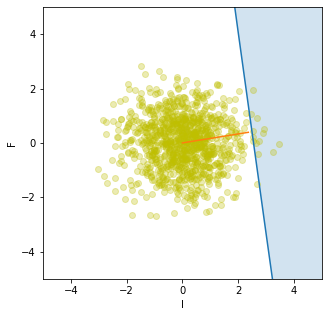

In [4]:
def limit_state_F(length, distance, elasticity, inertia):
    """
    Parametric equation for limit state surface for F as a function of l
    """
    return 35 / (distance ** 2 * (3 * length - distance)
                 / (6 * elasticity * inertia))


# Plot the limit state surface - where performance function is zero
x_plot = np.arange(-10, 10)
unnormalised_x = unnormalise(x_plot, mean_l, std_l)
limit_state = limit_state_F(unnormalised_x, 3000, 200000, 78125000)
normalised_limit_state = normalise(limit_state, mean_F, std_F)
plt.plot(x_plot, normalised_limit_state)
# Shade failure region - to the right of limit state surface
# (performance function < 0)
plt.fill_between(x_plot, normalised_limit_state, 5, alpha=0.2)

# Plot some samples from the Monte Carlo simulation
n_samples_to_plot = 1000
plt.scatter(
    samples_standardised[:n_samples_to_plot, 0],
    samples_standardised[:n_samples_to_plot, 1],
    alpha=0.3, color="y"
)

# Plot beta - the line linking design point with the origin
plt.plot([0, design_point[0]], [0, design_point[1]])

# Set plot properties
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel("l")
plt.ylabel("F")
plt.show()